#### General code instructions
***Libraries***
- import necessary libraries

***Overview of the Dataset***
- display the dataset/ table (only first few rows)
- show what the data set contains: column names and short description
- show data set dimension: number of rows & number of columns
- use info(): show the data types of each each column
- check for missing values
    - display the count of missing values for each column
    - describe approach and explain: filline with median, mean or dropping
- check for any duplicates
 
***Basic Descriptive Stats***?
- use describe(): show a summary statistics forthe stream columnss
- count unique values in column(released_year and artist_count)s to show distributio
- Identify noticeable trends or outliers?
  - determine trends: create plots and provide short explaination (correlation and comparison)n  -  identify outliers: can use z-score or IQR methods  -  describe out approach of handling outlier

***Top performer***
- ? Display the top 5 most streamed tracks- determine re the top 5 most frequent artists based on the number of tracks in the data

***Temporal Trends***
- Time (Year and Months) number of tracks
  - Plot heatmap?  - explain trends
  - explain relationship
  -  describe impac
- Streams and Musical Attributes
 - d musical attribut:ee bp key, mode, , danceability_%, and energy, valence_%
   pending to be included: instrumentalness_%, acousticness_%, liveness_%
   optional, may not have a significance: speechiness_%
 - plot correlation matrix(relationship), scatter plot(significant correlation)
 - perform multiple linear regression
 - explain trends
 - explain correlation
 - describe impact
 - identify any patterns among tracks with the same key or mode
- danceability_% and energy_% (predict a strong correlation)
 - plot scatter plot
 - explain trends
 - explain correlation
 - describe impact
- valence_% and acousticness_% (predict a weak correlation)
 - plot scatter plot
 - explain trends
 - explain correlation
 - describe impact


***Platform Popularity*** (not yet)
- How do the numbers of tracks in spotify_playlists, spotify_charts, apple_chart, apple_playlists compare, deezer_playlists, dezeer_chart,
  _shazam_chart compare
- Which platform seems to favor the most popular tracks?
- Artist and platforms(playlist and charts): frequencyompare the most frequently appearing artists in playlists or chartshart.**NOTE**: in the given dataset no genre is included


<div style="background-color: forestgreen; padding: 15px; width: 100%; margin: 0 auto;">
    <h2 style="color: white; font-weight: bold; font-size: 32px; text-align: center; font-family:'Comic Sans MS';">Library</h2>
</div>

In [7]:
# Include necessary libraries for data manipulation, analysis and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<div style="background-color: forestgreen; padding: 15px; width: 100%; margin: 0 auto;">
    <h2 style="color: white; font-weight: bold; font-size: 32px; text-align: center; font-family:'Comic Sans MS';">Load the Dataset</h2>
</div>

In [9]:
track_ = pd.read_excel('spotify_2023.xlsx')

track_ds = pd.DataFrame(track_)
print(track_ds)

                              track_name      artist(s)_name  artist_count  \
0    Seven (feat. Latto) (Explicit Ver.)    Latto, Jung Kook             2   
1                                   LALA         Myke Towers             1   
2                                vampire      Olivia Rodrigo             1   
3                           Cruel Summer        Taylor Swift             1   
4                         WHERE SHE GOES           Bad Bunny             1   
..                                   ...                 ...           ...   
948                         My Mind & Me        Selena Gomez             1   
949            Bigger Than The Whole Sky        Taylor Swift             1   
950                 A Veces (feat. Feid)  Feid, Paulo Londra             2   
951                        En La De Ella  Feid, Sech, Jhayco             3   
952                                Alone           Burna Boy             1   

     released_year  released_month  released_day  in_spotify_pl

<div style="background-color: forestgreen; padding: 15px; width: 100%; margin: 0 auto;">
    <h2 style="color: white; font-weight: bold; font-size: 32px; text-align: center; font-family:'Comic Sans MS';">Overview of the Dataset</h2>
</div>

In [18]:
# Import the pandas library
import pandas as pd

# Load the dataset (adjust the file path if necessary)
track_ds = pd.read_excel('spotify_2023.xlsx')  # Or use pd.read_csv('spotify_2023.csv')

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(track_ds.head())

# Show dataset dimensions (number of rows and columns)
num_rows, num_columns = track_ds.shape
print(f"\nDataset dimensions: {num_rows} rows, {num_columns} columns")

# Column names and descriptions (sourced from the dataset provider)
print("\nColumn Names and Descriptions:")
column_descriptions = {
    "track_name": "Title of the track",
    "artist(s)_name": "Primary and featured artists of the track",
    "artist_count": "Total number of artists associated with the track",
    "released_year": "Year the track was released",
    "released_month": "Month the track was released",
    "released_day": "Day of the month when the track was released",
    "in_spotify_playlists": "Count of Spotify playlists featuring the track",
    "in_spotify_charts": "Ranking and presence of the track on Spotify charts",
    "streams": "Total Spotify streams for the track",
    "in_apple_playlists": "Count of Apple Music playlists featuring the track",
    "in_apple_charts": "Ranking and presence of the track on Apple Music charts",
    "in_deezer_playlists": "Count of Deezer playlists featuring the track",
    "in_deezer_charts": "Ranking and presence of the track on Deezer charts",
    "in_shazam_charts": "Ranking and presence of the track on Shazam charts",
    "bpm": "Track tempo in beats per minute",
    "key": "Key signature of the track",
    "mode": "Mode of the track (major or minor)",
    "danceability_%": "Measure of the track’s suitability for dancing",
    "valence_%": "Score indicating the positivity of the track",
    "energy_%": "Perceived energy level of the track",
    "acousticness_%": "Amount of acoustic content in the track",
    "instrumentalness_%": "Amount of instrumental content in the track",
    "liveness_%": "Indicator of live elements within the track",
    "speechiness_%": "Degree of spoken words in the track"
}

# Display each column's description
for col, desc in column_descriptions.items():
    print(f"{col}: {desc}")

# Display column names and data types, along with missing values
print("\nData Types and Missing Values for Each Column:")
print(track_ds.info())

# Count missing values for each column
missing_values = track_ds.isnull().sum()
print("\nMissing Values Count by Column:")
print(missing_values)

# Handle missing values by filling numeric columns with their median values
for col in track_ds.select_dtypes(include='number').columns:
    track_ds.loc[:, col] = track_ds[col].fillna(track_ds[col].median())

print("\nFilled missing values in numerical columns with the median.")

# Check for any duplicated rows
duplicate_rows_count = track_ds.duplicated().sum()
print(f"\nNumber of duplicated rows: {duplicate_rows_count}")

# If you want to drop duplicates, uncomment the following line:
# track_ds = track_ds.drop_duplicates()

# Code complete message
print("\nDataset inspection and preparation complete.")


First few rows of the dataset:
                            track_name    artist(s)_name  artist_count  \
0  Seven (feat. Latto) (Explicit Ver.)  Latto, Jung Kook             2   
1                                 LALA       Myke Towers             1   
2                              vampire    Olivia Rodrigo             1   
3                         Cruel Summer      Taylor Swift             1   
4                       WHERE SHE GOES         Bad Bunny             1   

   released_year  released_month  released_day  in_spotify_playlists  \
0           2023               7            14                   553   
1           2023               3            23                  1474   
2           2023               6            30                  1397   
3           2019               8            23                  7858   
4           2023               5            18                  3133   

   in_spotify_charts    streams  in_apple_playlists  ...  bpm  key   mode  \
0             

<div style="background-color: forestgreen; padding: 15px; width: 100%; margin: 0 auto;">
    <h2 style="color: white; font-weight: bold; font-size: 32px; text-align: center; font-family:'Comic Sans MS';">Basic Descriptive Stats</h2>
</div>

Summary Statistics for 'streams' Column:
count    9.520000e+02
mean     5.141374e+08
std      5.668569e+08
min      2.762000e+03
25%      1.416362e+08
50%      2.905309e+08
75%      6.738690e+08
max      3.703895e+09
Name: streams, dtype: float64

Unique values in 'artist_count': 8
Unique values in 'released_year': 50


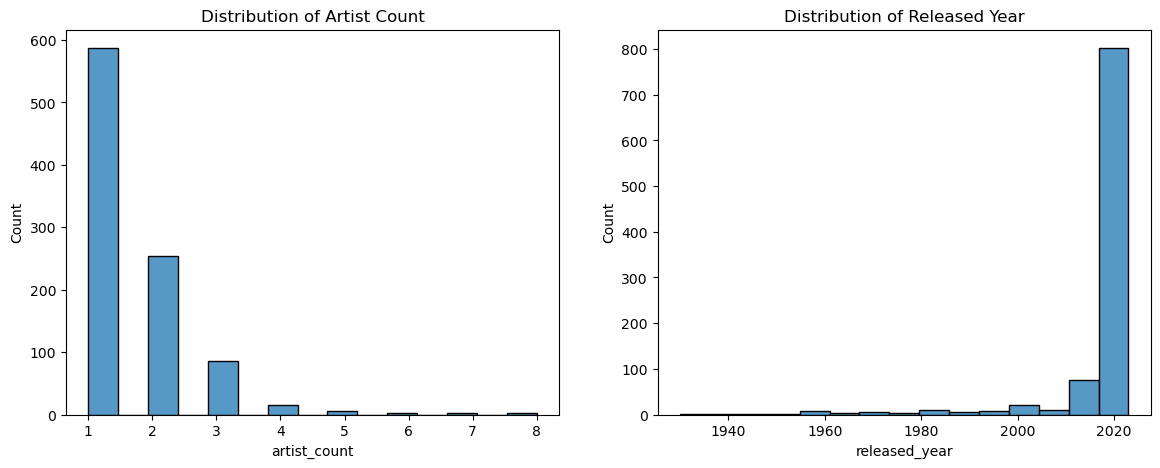


Outliers Detected in Each Numeric Column Using IQR (before treatment):
track_name: 1 outliers
artist(s)_name: 0 outliers
artist_count: 27 outliers
released_year: 151 outliers
released_month: 0 outliers
released_day: 0 outliers
in_spotify_playlists: 109 outliers
in_spotify_charts: 78 outliers
streams: 74 outliers
in_apple_playlists: 78 outliers
in_apple_charts: 9 outliers
in_deezer_playlists: 154 outliers
in_deezer_charts: 143 outliers
in_shazam_charts: 145 outliers
bpm: 5 outliers
key: 0 outliers
mode: 0 outliers
danceability_%: 3 outliers
valence_%: 0 outliers
energy_%: 4 outliers
acousticness_%: 0 outliers
instrumentalness_%: 87 outliers
liveness_%: 44 outliers
speechiness_%: 136 outliers

Updated Summary Statistics for Numeric Columns After Outlier Handling:
        track_name  artist(s)_name  artist_count  released_year  \
count     6.000000             0.0    953.000000     953.000000   
mean   1159.270833             NaN      1.515740    2020.912907   
std    1492.706398        

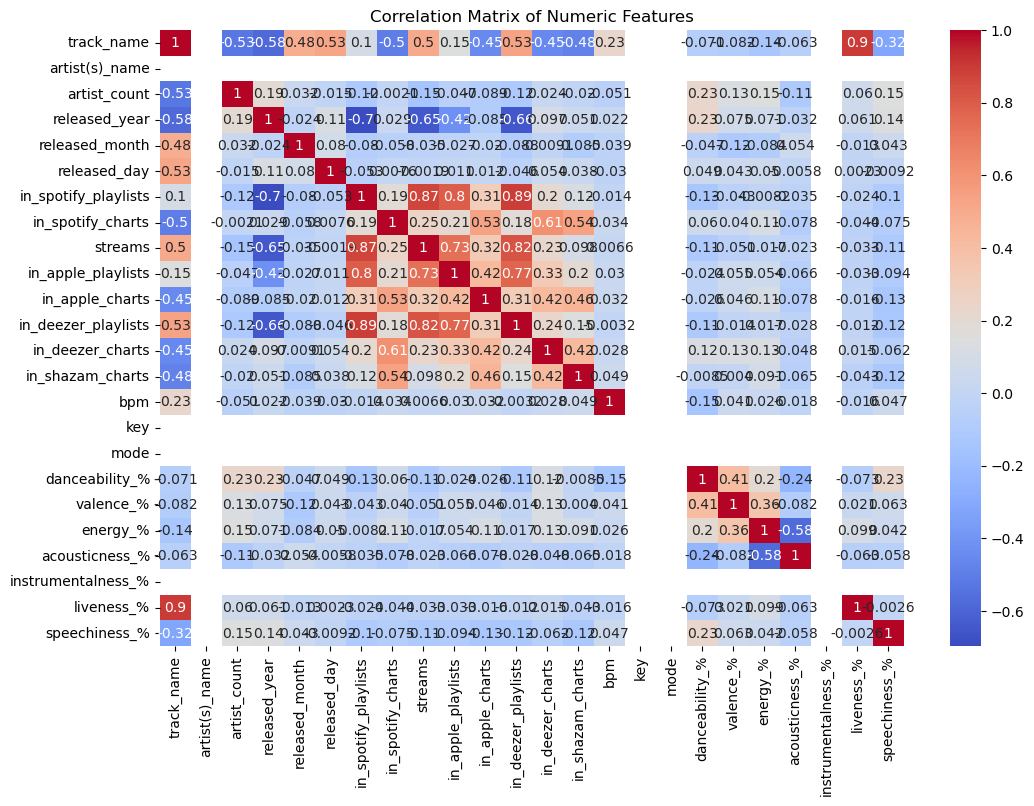

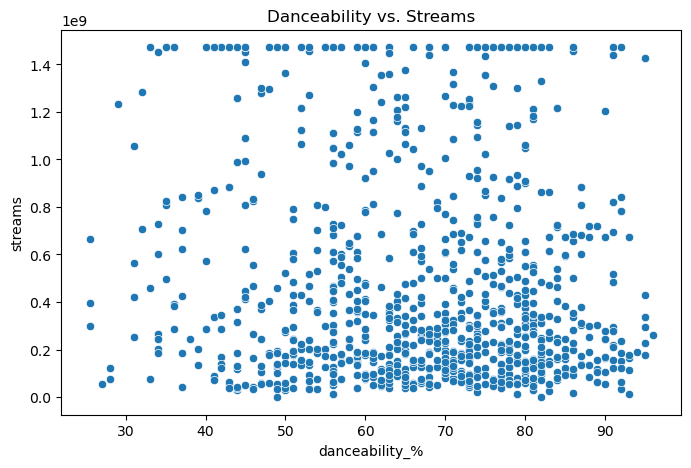

In [27]:
# Convert numeric columns to appropriate data types, coercing errors to NaN
for col in track_ds.select_dtypes(include=['object']).columns:
    track_ds[col] = pd.to_numeric(track_ds[col], errors='coerce')

# Display basic statistics for all columns, focusing on 'streams' column
print("Summary Statistics for 'streams' Column:")
print(track_ds['streams'].describe())

# Count unique values in 'artist_count' and 'released_year' to show distribution
unique_artist_count = track_ds['artist_count'].nunique()
unique_release_year = track_ds['released_year'].nunique()
print(f"\nUnique values in 'artist_count': {unique_artist_count}")
print(f"Unique values in 'released_year': {unique_release_year}")

# Distribution of 'artist_count' and 'released_year' with histograms
fig, axs = plt.subplots(1, 2, figsize=(14, 5))
sns.histplot(track_ds['artist_count'].dropna(), bins=15, ax=axs[0])
axs[0].set_title("Distribution of Artist Count")
sns.histplot(track_ds['released_year'].dropna(), bins=15, ax=axs[1])
axs[1].set_title("Distribution of Released Year")
plt.show()

# Outlier detection and treatment using IQR method
numeric_columns = track_ds.select_dtypes(include=['float64', 'int64']).columns
outliers_iqr = {}

for column in numeric_columns:
    Q1 = track_ds[column].quantile(0.25)
    Q3 = track_ds[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter rows outside of the IQR range for this column
    outliers_iqr[column] = track_ds[(track_ds[column] < lower_bound) | (track_ds[column] > upper_bound)][column]
    
    # Cap outliers at the boundaries
    track_ds[column] = np.where(track_ds[column] < lower_bound, lower_bound,
                                np.where(track_ds[column] > upper_bound, upper_bound, track_ds[column]))

# Display outlier counts for each numeric column
print("\nOutliers Detected in Each Numeric Column Using IQR (before treatment):")
for column, outlier_values in outliers_iqr.items():
    print(f"{column}: {len(outlier_values)} outliers")

# Show the effect of outlier treatment with new descriptive statistics
print("\nUpdated Summary Statistics for Numeric Columns After Outlier Handling:")
print(track_ds.describe())

# Correlation analysis between 'streams' and other musical attributes
correlation_matrix = track_ds.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Numeric Features")
plt.show()

# Scatter plot example to examine correlation between 'streams' and 'danceability_%'
plt.figure(figsize=(8, 5))
sns.scatterplot(x='danceability_%', y='streams', data=track_ds)
plt.title("Danceability vs. Streams")
plt.show()


<div style="background-color: forestgreen; padding: 15px; width: 100%; margin: 0 auto;">
    <h2 style="color: white; font-weight: bold; font-size: 32px; text-align: center; font-family:'Comic Sans MS';">Top Artists</h2>
</div>

Top 5 Most Streamed Tracks:
    track_name       streams  artist(s)_name
14         NaN  1.472218e+09             NaN
41         NaN  1.472218e+09             NaN
47         NaN  1.472218e+09             NaN
48         NaN  1.472218e+09             NaN
54         NaN  1.472218e+09             NaN

Top 5 Most Frequent Artists (Based on Track Count):
Series([], Name: count, dtype: int64)


<div style="background-color: forestgreen; padding: 15px; width: 100%; margin: 0 auto;">
    <h2 style="color: white; font-weight: bold; font-size: 32px; text-align: center; font-family:'Comic Sans MS';">Trends among the Dataset</h2>
</div>

<div style="background-color: forestgreen; padding: 15px; width: 100%; margin: 0 auto;">
    <h2 style="color: white; font-weight: bold; font-size: 32px; text-align: center; font-family:'Comic Sans MS';">Track Popularity</h2>
</div>

<div style="background-color: forestgreen; padding: 15px; width: 100%; margin: 0 auto;">
    <h2 style="color: white; font-weight: bold; font-size: 32px; text-align: center; font-family:'Comic Sans MS';">Platform Popularity</h2>
</div>